In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

In [2]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    
    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=8)
clf.alpha = 1
clf.max_iter = 2000
hidden_layer_sizes=(10,)

clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=8, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

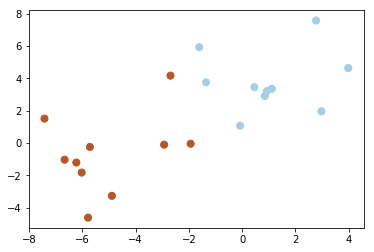

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


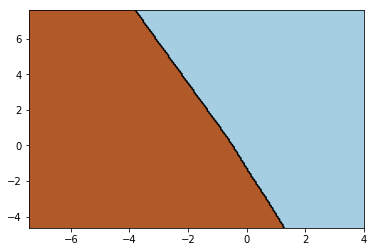

In [5]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

plotBoundary(X, clf)

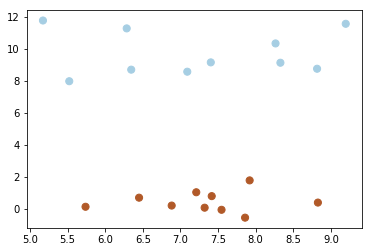

In [6]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=8
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


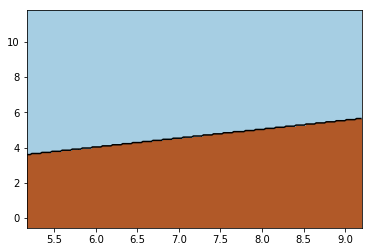

In [7]:
clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


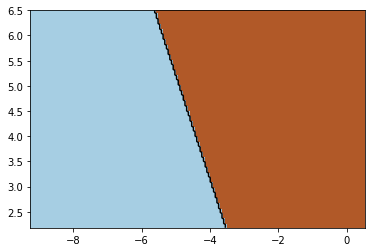

In [8]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=7
                 )

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


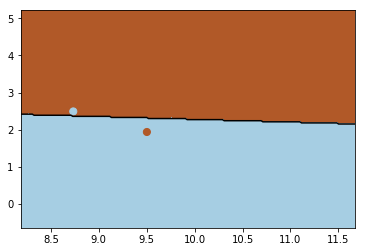

In [9]:
X, y = make_blobs(n_samples=20,
                  n_features=2,
                  centers=2,
                  cluster_std=1,
                  random_state=4
                 )

clf.fit(X, y)

plotBoundary(X, clf)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)

In [10]:
def draw_neural_net(layer_sizes, left=.1, right=.9, bottom=.1, top=.9, size=5):
    
    fig = plt.figure(figsize=(size, size))
    ax = fig.gca()
    ax.axis('off')
    
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size -1) / 2. + (top + bottom) / 2.
        
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                 color='w', ec='k', zorder=4)
            ax.add_artist(circle)
        
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

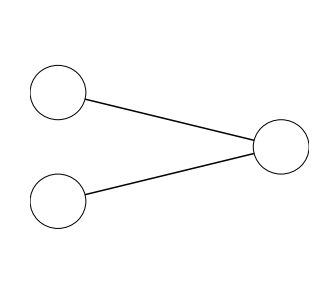

In [11]:
draw_neural_net([2, 1])

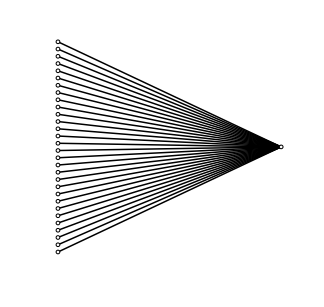

In [12]:
draw_neural_net([30, 1])

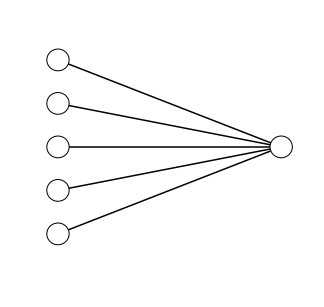

In [13]:
draw_neural_net([5, 1])

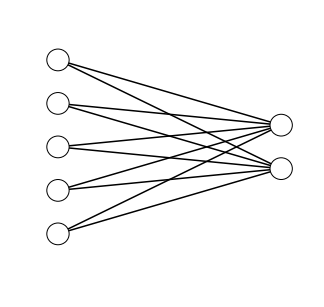

In [14]:
draw_neural_net([5, 2])

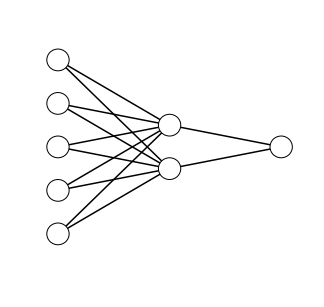

In [15]:
draw_neural_net([5, 2, 1])

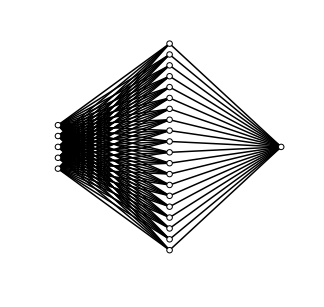

In [16]:
draw_neural_net([5, 20, 1])

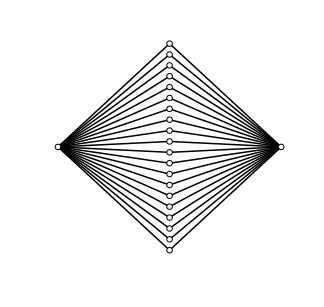

In [17]:
draw_neural_net([1, 20, 1])

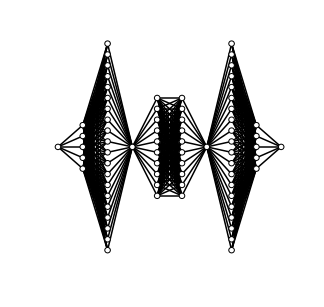

In [18]:
draw_neural_net([1, 5, 20, 1, 10, 10, 1, 20, 5, 1])

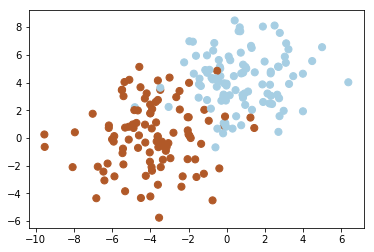

In [19]:
X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=2,
                  cluster_std=2,
                  random_state=3
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

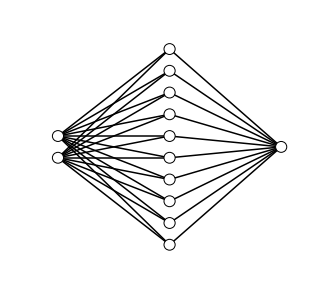

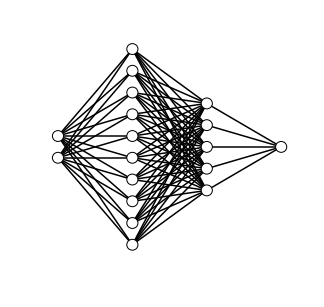

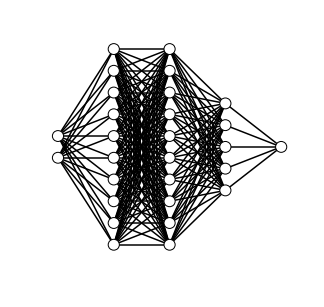

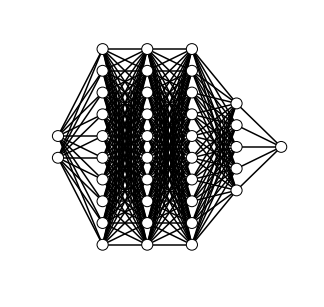

In [20]:
draw_neural_net([2, 10, 1], size=5)
draw_neural_net([2, 10, 5, 1], size=5)
draw_neural_net([2, 10, 10 ,5, 1], size=5)
draw_neural_net([2, 10, 10, 10, 5, 1], size=5)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


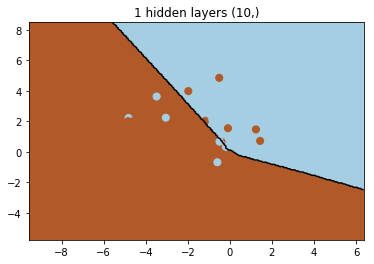

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


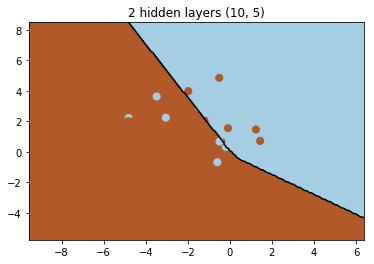

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


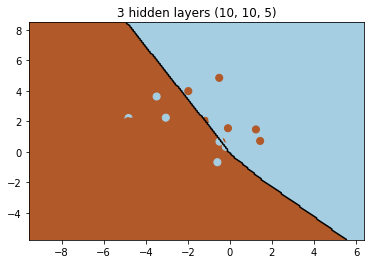

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


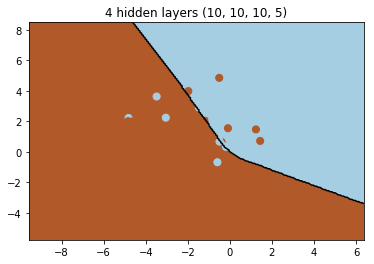

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


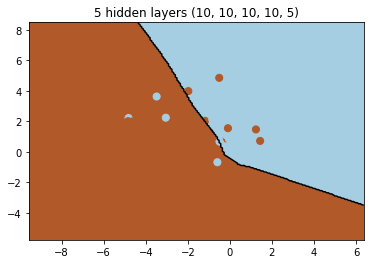

In [21]:
clf.random_state = 10

for layers in [(10,),
               (10, 5),
               (10, 10 ,5),
               (10, 10, 10, 5),
               (10, 10, 10, 10, 5)]:
    clf.hidden_layer_sizes = layers
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    plotBoundary(X, clf)
    plt.title("{0} hidden layers {1}".format(len(layers), layers))
    plt.show()

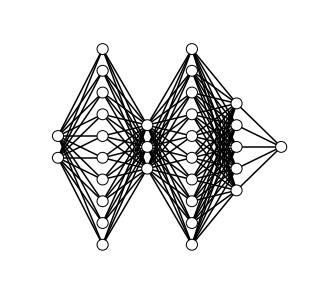

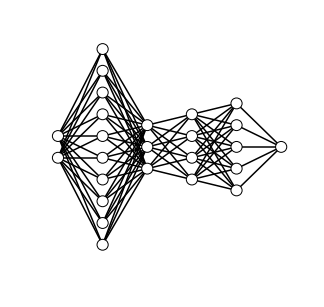

In [22]:
draw_neural_net([2, 10, 3, 10, 5, 1], size=5)
draw_neural_net([2, 10, 3, 4, 5, 1], size=5)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


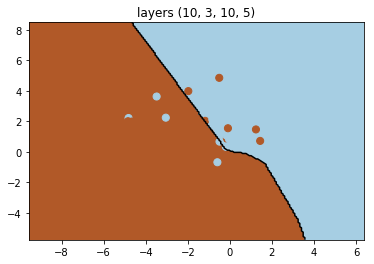

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


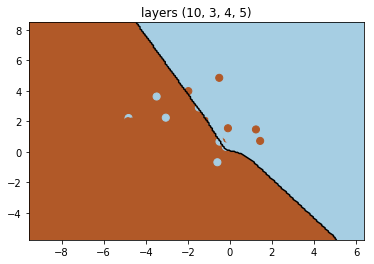

In [23]:
clf.random_state = 10

for layers in [(10, 3, 10, 5),
               (10, 3, 4, 5)]:
    clf.hidden_layer_sizes = layers
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


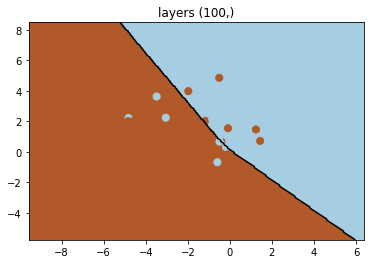

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


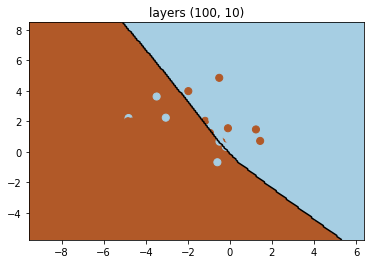

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


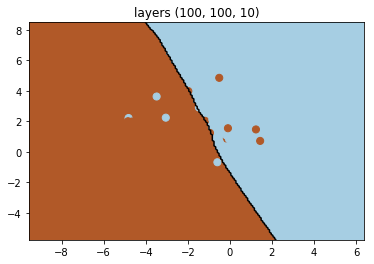

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


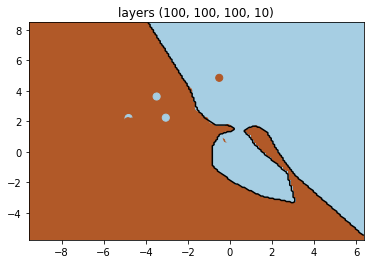

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


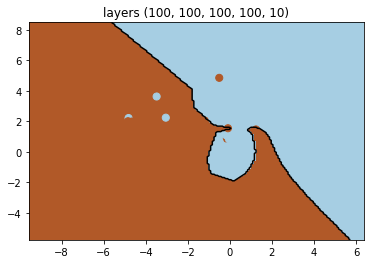

In [24]:
clf.random_state = 10

for layers in [(100,),
               (100, 10),
               (100, 100, 10),
               (100, 100, 100, 10),
               (100, 100, 100, 100, 10)]:
    
    clf.hidden_layer_sizes = layers
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y)
    plotBoundary(X, clf)
    plt.title("layers {0}".format(layers))
    plt.show()

In [25]:
clf

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=2000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=10, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [26]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [27]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size = 0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [28]:
clf = MLPClassifier()
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9385964912280702

In [30]:
for layers in [(100,),
               (100, 10),
               (100, 100, 10),
               (100, 100, 100, 10),
               (100, 100, 100, 100, 10),
               (100, 100, 100, 100, 100, 10)]:
    
    clf.hidden_layer_sizes = layers
    clf.fit(X_train, y_train)
    
    print("{0} hidden layers".format(len(layers)), clf.score(X_test, y_test))

1 hidden layers 0.9298245614035088
2 hidden layers 0.9298245614035088
3 hidden layers 0.8771929824561403
4 hidden layers 0.9122807017543859
5 hidden layers 0.8596491228070176
6 hidden layers 0.8596491228070176


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [32]:
clf = MLPClassifier()
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9736842105263158

In [34]:
clf.alpha = 1
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.956140350877193

In [35]:
for layers in [(100,),
               (100, 10),
               (100, 100, 10),
               (100, 100 ,100, 10),
               (100, 100, 100, 100, 10),
               (100, 100, 100, 100, 100, 10)]:
    
    clf.hidden_layer_sizes = layers
    clf.fit(X_train_scale, y_train)
    
    print("{0} hidden layers".format(len(layers)), clf.score(X_test_scale, y_test))

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layers 0.956140350877193


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2 hidden layers 0.9736842105263158


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3 hidden layers 0.956140350877193


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4 hidden layers 0.9649122807017544


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5 hidden layers 0.9736842105263158
6 hidden layers 0.9824561403508771


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 1 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 2 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 3 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 4 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 5 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 6 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 7 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 8 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 9 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 10 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 11 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 12 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 13 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 14 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 15 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 16 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 17 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 hidden layer with 18 nodes
1 hidden layer with 19 nodes


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


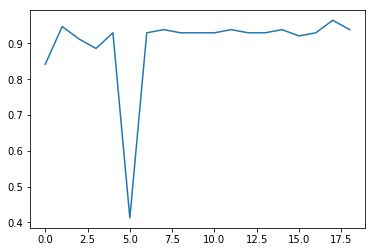

In [36]:
scores = []

for nodes in range(1, 20):
    clf.hidden_layer_sizes = (nodes, )
    
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    
    print("1 hidden layer with {0} nodes".format(nodes))
    scores.append( score )
    
scores = np.array(scores)
plt.plot(scores)